In [1]:
import os
from datetime import datetime as dt
import pandas as pd
import seaborn as sns
from datagenic_rest_client.datagenic import DataGenic
from tshistory.api import timeseries
import matplotlib.pyplot as plt
from DG import get_prices_df

datagenic_rest_server = "http://lon-qdev-ap11"
tsa = timeseries('http://tst-qdev-ap9.petroineos.local/api')

d = DataGenic(
    url_rest_wrapper=datagenic_rest_server, datagenic_url=os.environ["datagenicserver"],
  datagenic_username=os.environ["datagenicusername"], datagenic_password=os.environ["datagenicpassword"])

In [2]:
plt.style.use('ggplot')

In [3]:
model_dict = {
    'TD25_M00':"model://BALT_FFA/EU.FR.FFA.TD25_USD.BALTIC.M00",
    "TD7_M00": "model://BALT_FFA/EU.FR.FFA.TD7_USD.BALTIC.M00",
    "TD7_M01": "model://BALT_FFA/EU.FR.FFA.TD7_USD.BALTIC.M01",
    "TD3_M00":"model://BALT_FFA/EU.FR.FFA.TD3_USD.BALTIC.M00"
    }

In [4]:
df = get_prices_df(model_dict=model_dict, start=dt(2019,6,1))

In [5]:
df.plot(ylabel='$/tn', figsize=(10,5))

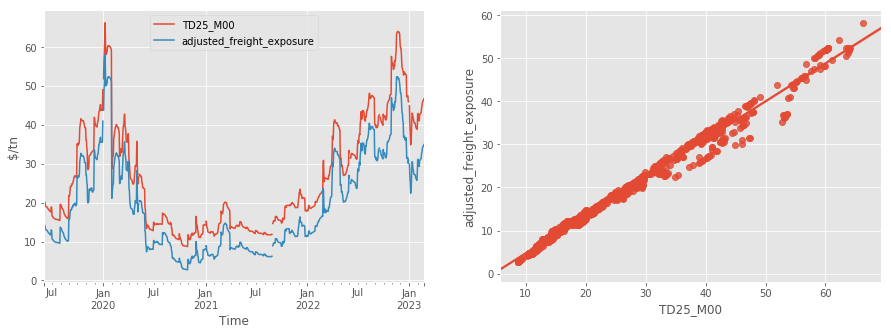

In [72]:
df['adjusted_freight_exposure'] = df['TD25_M00'] - df['TD7_M01']
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
df.plot(y=['TD25_M00','adjusted_freight_exposure'] , ylabel='$/tn', ax=ax[0])
sns.regplot(data=df, x='TD25_M00',y='adjusted_freight_exposure', ax=ax[1])

0.6771435287831238


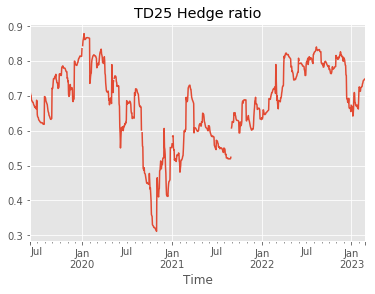

In [73]:
hedge_ratio = df['adjusted_freight_exposure']/df['TD25_M00']
hedge_ratio.plot(title='TD25 Hedge ratio')
print(hedge_ratio.mean())

In [78]:
df['70% TD25'] = df.apply(lambda x: x['TD25_M00']*0.7, axis=1)
df['basis_risk'] = df['70% TD25'] - df['adjusted_freight_exposure']

In [76]:
df.head()

TD25_M00  TD7_M00  TD7_M01  adjusted_freight_exposure  70% TD25
Time                                                                       
2019-06-03    21.016    6.157    5.998                     15.018   14.7112
2019-06-04    20.485    6.161    5.998                     14.487   14.3395
2019-06-05    20.143    6.165    5.998                     14.145   14.1001
2019-06-06    20.056    6.169    5.998                     14.058   14.0392
2019-06-07    19.240    6.171    5.998                     13.242   13.4680

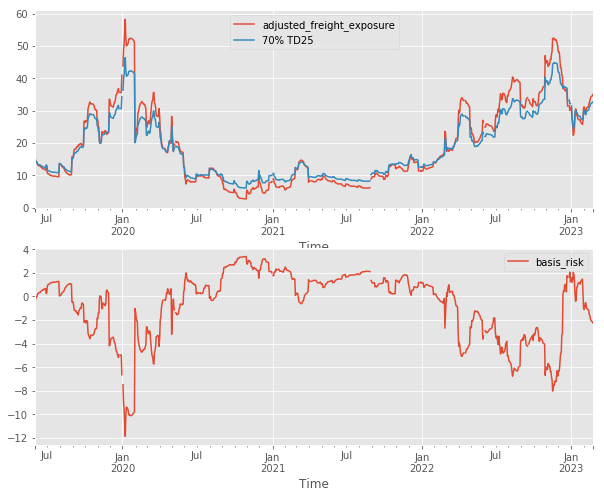

In [82]:
fig, ax = plt.subplots(nrows=2, figsize=(10,8))
df.plot(y=['adjusted_freight_exposure','70% TD25'], ax=ax[0])
df.plot(y=['basis_risk'], ax=ax[1])

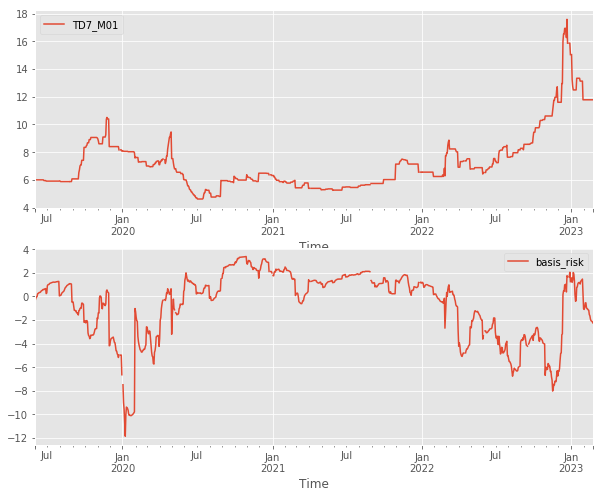

In [84]:
fig, ax = plt.subplots(nrows=1, figsize=(10,8))
df.plot(y=['TD7_M01'], ax=ax[0])
df.plot(y=['basis_risk'], ax=ax[1])

### FAF vs TD7

In [65]:
faf_list = ["model://PLATTS_RI/PLATTS.CRUDE.RI.FSVRM00",
"model://PLATTS_RI/PLATTS.CRUDE.RI.FHPRM00",
"model://PLATTS_RI/PLATTS.CRUDE.RI.FSTRM00",
"model://PLATTS_RI/PLATTS.CRUDE.RI.FTSRM00",
"model://PLATTS_RI/PLATTS.CRUDE.RI.FMGRM00"]

In [34]:
start = dt(2020,1,1)
td7_m00 = d.get_time_series(model_url = "model://BALT_FFA/EU.FR.FFA.TD7_USD.BALTIC.M00", from_date=start, to_date=dt.today())
empty_list = []
for x in faf_list:
    y = d.get_time_series(model_url = x, from_date=start, to_date=dt.today())
    empty_list.append(y)

In [41]:
fafs = pd.concat(empty_list,axis=1).mean(axis=1)
td7_bbl = td7_m00 * 0.133

In [42]:
df = pd.concat([fafs,td7_bbl], axis=1)
df.columns = ['faf_bbl', 'td7']

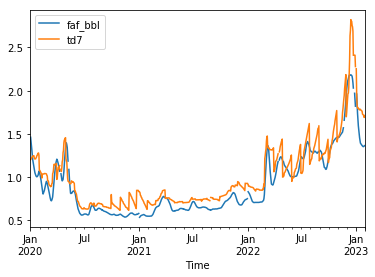

In [43]:
df.plot()

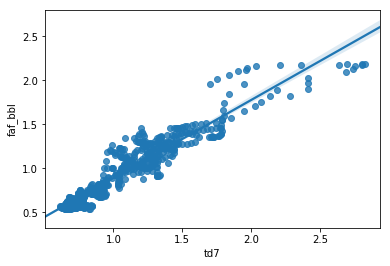

In [107]:
sns.regplot(data=df,x='td7', y='faf_bbl')

In [62]:
# d.get_curve("model://BALT_FFA/EU.FR.FFA.TD7_USD.BALTIC")

In [2]:
"model://BALT_FFA/EU.FR.FFA.TD7_USD.BALTIC.M00"
"model://BALT_FFA/EU.FR.FFA.TD7_USD.BALTIC.2023M01"

td7_suffix = ['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'Q03', 'Q04']
td7_curve = []
for x in td7_suffix:
    value = d.get_time_series(model_url=f'model://BALT_FFA/EU.FR.FFA.TD7_USD.BALTIC.2023{x}', from_date=dt(2023,1,31), to_date=dt.today())
    td7_curve.append(value)

td7_curve = pd.concat(td7_curve, axis=1)

In [3]:
td7_curve.columns = td7_suffix

In [4]:
td7_curve

M01     M02     M03     M04     M05    M06     Q03     Q04
Time                                                                  
2023-01-31  NaN  12.876  11.781  11.564  11.279  10.93  10.955  11.829
2023-02-01  NaN  12.872  11.781  11.564  11.279  10.93  10.955  11.829
2023-02-02  NaN  12.866  11.781  11.564  11.279  10.93  10.955  11.829
2023-02-03  NaN  12.873  11.781  11.564  11.279  10.93  10.955  11.829
2023-02-06  NaN  12.854  11.781  11.564  11.279  10.93  10.955  11.829
2023-02-07  NaN  12.923  11.781  11.564  11.279  10.93  10.955  11.829
2023-02-08  NaN  12.916  11.781  11.564  11.279  10.93  10.955  11.829
2023-02-09  NaN  12.906  11.781  11.564  11.279  10.93  10.955  11.829
2023-02-10  NaN  12.892  11.781  11.564  11.279  10.93  10.955  11.829
2023-02-13  NaN  12.876  11.781  11.564  11.279  10.93  10.955  11.829
2023-02-14  NaN  12.859  11.781  11.564  11.279  10.93  10.955  11.829
2023-02-15  NaN  12.837  11.781  11.564  11.279  10.93  10.955  11.829
2023-02-16  NaN  12.816  11.781  11.564  11.279  10.93  10.955  11.829
2023-02-17  NaN  12.795  11.781  11.564  11.279  10.93  10.955  11.829
2023-02-20  NaN  12.774  11.781  11.564  11.279  10.93  10.955  11.829
2023-02-21  NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN

In [8]:
td7_curve_bbl = td7_curve.loc['2023-2-20'].copy()*0.133

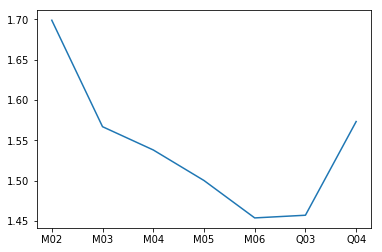

In [9]:
td7_curve_bbl.plot()

In [10]:
td7_curve_bbl.to_csv('faf.csv')

In [63]:
start=dt(2021,7,22)
wti_cif_nwe = d.get_time_series("model://PLATTS_RI/PLATTS.CRUDE.RI.WMCRB00/CLOSE/ALL", from_date=start, to_date=dt.today())
empty_list = []
for x in faf_list:
    y = d.get_time_series(model_url = x, from_date=start, to_date=dt.today())
    empty_list.append(y)
fafs = pd.concat(empty_list,axis=1).mean(axis=1)
wti_fob = wti_cif_nwe-0.8*fafs

In [77]:
wti_fob = pd.concat([wti_cif_nwe,fafs],axis=1)
wti_fob.columns = ['wti_cif', 'faf']
wti_fob['wti_fob'] = wti_fob['wti_cif'] - 0.8*wti_fob['faf']

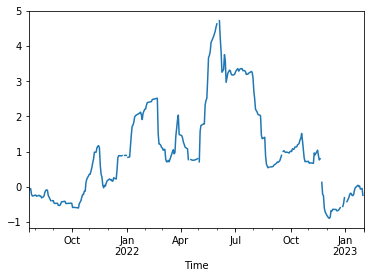

In [79]:
wti_fob['wti_fob'].plot()

In [83]:
wti_fob_m = wti_fob['wti_fob'].resample('MS').mean()

In [81]:
north_america_net_length = tsa.get("crude.petroineos.north_america.net_length.kbd.monthly")
nwe_net_length = tsa.get("crude.petroineos.nwe.net_length.kbd.monthly")

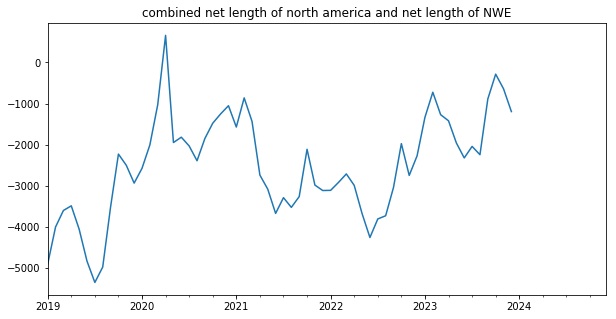

In [113]:
diff = north_america_net_length + nwe_net_length
diff.loc['2019':].plot(figsize=(10,5), title=('combined net length of north america and net length of NWE'))

In [114]:
# corr = pd.concat([wti_fob_m,diff], left_index=True, right_index=True)
corr = pd.concat([wti_fob_m,diff], axis=1).loc['2021-7-22':]
corr.columns = ['wti_fob', 'net_length']

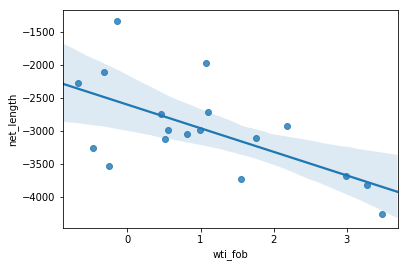

In [115]:
sns.regplot(data=corr, x='wti_fob', y='net_length')

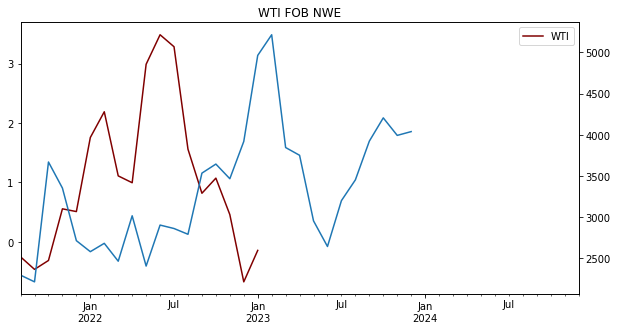

In [101]:
fig, ax = plt.subplots(1,figsize=(10,5))
corr['wti_fob'].plot(ax=ax, color='maroon')
ax2 = ax.twinx()
corr['net_length'].plot(ax=ax2)
ax.set_title(label='WTI FOB NWE')
ax.legend(['WTI', 'net_length'])

In [116]:
wti_brent = d.get_time_series("model://ICE_BRT_WTI_SP/EU.OIL.NSEA_WTI.ICE.BRENT_WTI.FUT.SP.M01", from_date=dt(2010,1,1), to_date=dt.today())

In [119]:
wti_brent_m = wti_brent.resample("MS").mean()

In [125]:
# diff.to_frame()
corr_2010 = wti_brent_m.merge(diff.to_frame(), left_index=True, right_index=True)
corr_2010.columns = ['spread', 'net_length']

In [130]:
corr_2010[corr_2010['spread']>10]

spread   net_length
2011-03-01  161.694783 -9468.041846

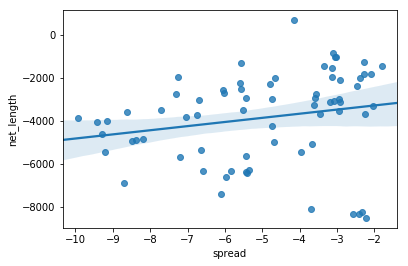

In [138]:
sns.regplot(data=corr_2010.loc['2017-04-01':], x='spread', y='net_length')